## NBA Basketball - Offensive and Defensive Game Play

In [1]:
from pymongo import MongoClient
import pprint

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

# Requests sends and receives HTTP requests.
import requests

import json
import time
import copy

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
from nba_api.stats.static import teams
from nba_api.stats.static import players
from nba_api.stats.endpoints import leaguegamelog
from nba_api.stats.endpoints import leaguedashteamstats
from nba_api.stats.endpoints import boxscorefourfactorsv2
from nba_api.stats.endpoints import boxscoreadvancedv2

In [4]:
teams_df = pd.DataFrame(teams.get_teams())
teams_df.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [5]:
player_df = pd.DataFrame(players.get_players())
player_df.head()

,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,False
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,False
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,False
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,False


In [6]:
#game_log_1819 = leaguegamelog.LeagueGameLog(counter = 0, direction = "DESC",
#                 league_id = "00", player_or_team_abbreviation = "T", season = "2018-19",
#                 season_type_all_star = "Regular Season", sorter = "DATE").get_data_frames()

In [7]:
#game_log_1819[0].to_csv(r'../data_1/game_log_1819.csv', index=False)

In [8]:
types_dict = {'GAME_ID': str}
game_log_1819 = pd.read_csv('../data_1/game_log_1819.csv', dtype=types_dict)
game_log_1819.head() 
#2018-19 Regular season game stats 

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22018,1610612744,GSW,Golden State Warriors,0021801225,2019-04-10,GSW @ MEM,L,240,46,92,0.500,13,30,0.433,12,14,0.857,9,30,39,32,3,5,14,17,117,-15,1
1,22018,1610612763,MEM,Memphis Grizzlies,0021801225,2019-04-10,MEM vs. GSW,W,240,48,98,0.490,21,46,0.457,15,18,0.833,15,34,49,25,9,0,11,18,132,15,1
2,22018,1610612766,CHA,Charlotte Hornets,0021801222,2019-04-10,CHA vs. ORL,L,240,41,78,0.526,8,29,0.276,24,27,0.889,4,28,32,21,3,4,8,14,114,-8,1
3,22018,1610612753,ORL,Orlando Magic,0021801222,2019-04-10,ORL @ CHA,W,240,48,88,0.545,11,30,0.367,15,20,0.750,9,30,39,24,5,2,6,19,122,8,1
4,22018,1610612750,MIN,Minnesota Timberwolves,0021801228,2019-04-10,MIN @ DEN,L,240,39,91,0.429,13,32,0.406,4,6,0.667,7,34,41,24,6,0,10,22,95,-4,1


In [9]:
game_id_lst = game_log_1819['GAME_ID'].tolist() #list created to iterate over advanced game stats below

In [10]:
#leaguedashteamstats = leaguedashteamstats.LeagueDashTeamStats(season = "2018-19", season_type_all_star='Regular Season').get_data_frames()

In [11]:
#leaguedashteamstats[0].to_csv(r'../data_1/leaguedashteamstats.csv', index=False)

In [12]:
leaguedashteamstats = pd.read_csv('../data_1/leaguedashteamstats.csv')
leaguedashteamstats.head()
#league stats by team for 2018-19 regular season

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
0,1610612737,Atlanta Hawks,82,29,53,0.354,3971.0,3392,7524,0.451,1067,3034,0.352,1443,1918,0.752,955,2825,3780,2118,1397.0,675,419,448,1932,1817,9294,-494.0,1,26,26,26,7,15,4,21,4,3,16,18,12,21,4,18,12,10,30,11,14,24,29,5,12,26,10,Atlanta Hawks
1,1610612738,Boston Celtics,82,49,33,0.598,3956.0,3451,7423,0.465,1032,2829,0.365,1282,1598,0.802,804,2849,3653,2155,1052.0,706,435,317,1670,1602,9216,364.0,1,9,9,9,18,11,9,14,6,7,7,28,29,4,20,16,22,5,3,4,10,2,12,26,14,6,10,Boston Celtics
2,1610612751,Brooklyn Nets,82,42,40,0.512,3996.0,3301,7358,0.449,1047,2965,0.353,1555,2088,0.745,900,2919,3819,1954,1236.0,539,339,432,1763,1807,9204,-6.0,1,14,14,14,1,20,14,25,5,5,14,6,4,24,10,10,7,21,26,27,28,22,23,7,15,15,10,Brooklyn Nets
3,1610612766,Charlotte Hornets,82,39,43,0.476,3966.0,3297,7362,0.448,977,2783,0.351,1510,1895,0.797,814,2778,3592,1905,1001.0,591,405,492,1550,1686,9081,-90.0,1,17,17,17,11,21,12,26,11,10,18,9,16,6,19,22,23,24,2,21,18,29,3,18,19,18,10,Charlotte Hornets
4,1610612741,Chicago Bulls,82,22,60,0.268,3981.0,3266,7205,0.453,745,2123,0.351,1328,1695,0.783,718,2799,3517,1796,1159.0,603,351,473,1663,1534,8605,-690.0,1,27,27,27,3,23,22,20,30,27,19,25,26,11,30,21,25,27,19,20,26,28,9,30,27,27,10,Chicago Bulls


In [13]:
#boxscorefourfactor = boxscorefourfactorsv2.BoxScoreFourFactorsV2(game_id='0021800997').get_data_frames()

In [14]:
#boxscorefourfactor[0].to_csv(r'../data_1/boxscorefourfactor.csv', index=False)

In [15]:
boxscorefourfactor = pd.read_csv('../data_1/boxscorefourfactor.csv', dtype=types_dict)
boxscorefourfactor.head()
#box score data by players in game DAL v. HOU

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT
0,0021800997,1610612745,HOU,Houston,201569,Eric Gordon,F,NaN,31:48,0.432,0.220,0.099,0.286,0.459,0.224,0.214,0.261
1,0021800997,1610612745,HOU,Houston,200782,P.J. Tucker,F,NaN,37:51,0.471,0.286,0.141,0.293,0.441,0.339,0.206,0.345
2,0021800997,1610612745,HOU,Houston,203991,Clint Capela,C,NaN,35:39,0.409,0.242,0.155,0.302,0.464,0.321,0.197,0.280
3,0021800997,1610612745,HOU,Houston,201935,James Harden,G,NaN,33:55,0.467,0.328,0.143,0.278,0.510,0.294,0.220,0.320
4,0021800997,1610612745,HOU,Houston,101108,Chris Paul,G,NaN,32:50,0.452,0.242,0.148,0.282,0.490,0.353,0.194,0.217


boxscoreadvancedv2 = pd.DataFrame()
for game_id in game_id_lst:
    boxscoreadvancedv2.append(boxscoreadvancedv2.BoxScoreAdvancedV2(game_id=game_id))
#0021800997

In [16]:
#boxscoreadvancedv2 = boxscoreadvancedv2.BoxScoreAdvancedV2(game_id='0021800997')

In [17]:
#boxscoreadvancedv2 = boxscoreadvancedv2.team_stats.get_data_frame()

In [18]:
#boxscoreadvancedv2.to_csv(r'../data_1/boxscoreadvancedv2.csv', index=False)

In [19]:
boxscoreadvancedv2 = pd.read_csv('../data_1/boxscoreadvancedv2.csv')
boxscoreadvancedv2.head()

,GAME_ID,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CITY,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,E_NET_RATING,NET_RATING,AST_PCT,AST_TOV,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,E_TM_TOV_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
0,21800997,1610612745,Rockets,HOU,Houston,240:00,96.2,98.9,99.1,97.9,-2.8,1.1,0.563,1.38,14.0,0.262,0.761,0.477,13.309,13.7,0.455,0.481,1.0,0.195,95.78,95.0,79.17,95,0.397
1,21800997,1610612742,Mavericks,DAL,Dallas,240:00,99.1,97.9,96.2,98.9,2.8,-1.1,0.774,1.41,18.8,0.239,0.738,0.523,18.108,17.9,0.473,0.535,1.0,0.198,95.78,95.0,79.17,95,0.603


### General Dataset Information

In [20]:
game_log_1819.shape

(2460, 29)

In [21]:
game_log_1819.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEASON_ID          2460 non-null   int64  
 1   TEAM_ID            2460 non-null   int64  
 2   TEAM_ABBREVIATION  2460 non-null   object 
 3   TEAM_NAME          2460 non-null   object 
 4   GAME_ID            2460 non-null   object 
 5   GAME_DATE          2460 non-null   object 
 6   MATCHUP            2460 non-null   object 
 7   WL                 2460 non-null   object 
 8   MIN                2460 non-null   int64  
 9   FGM                2460 non-null   int64  
 10  FGA                2460 non-null   int64  
 11  FG_PCT             2460 non-null   float64
 12  FG3M               2460 non-null   int64  
 13  FG3A               2460 non-null   int64  
 14  FG3_PCT            2460 non-null   float64
 15  FTM                2460 non-null   int64  
 16  FTA                2460 

In [22]:
game_log_1819.describe()

,SEASON_ID,TEAM_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
count,2460.0,2.460000e+03,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,22018.0,1.610613e+09,241.646341,41.082114,89.210569,0.461429,11.363821,32.008943,0.355224,17.680488,23.072358,0.767115,10.347154,34.818293,45.165447,24.586585,7.633740,4.953252,14.082927,20.904472,111.208537,0.000000,1.011382
std,0.0,8.657201e+00,7.601350,5.219906,7.332872,0.053312,3.730194,7.310012,0.086793,6.087503,7.466480,0.102344,3.758657,5.468226,6.692565,5.119577,2.947763,2.485716,3.927105,4.293642,12.651393,14.659231,0.106100
min,22018.0,1.610613e+09,240.000000,25.000000,64.000000,0.278000,2.000000,12.000000,0.115000,2.000000,4.000000,0.263000,1.000000,18.000000,22.000000,10.000000,0.000000,0.000000,3.000000,9.000000,68.000000,-56.000000,1.000000
25%,22018.0,1.610613e+09,240.000000,38.000000,85.000000,0.426000,9.000000,27.000000,0.296000,13.000000,18.000000,0.700000,8.000000,31.000000,41.000000,21.000000,6.000000,3.000000,11.000000,18.000000,103.000000,-9.000000,1.000000
50%,22018.0,1.610613e+09,240.000000,41.000000,89.000000,0.460000,11.000000,32.000000,0.353000,17.000000,23.000000,0.771000,10.000000,35.000000,45.000000,24.000000,7.000000,5.000000,14.000000,21.000000,111.000000,0.000000,1.000000
75%,22018.0,1.610613e+09,240.000000,44.000000,94.000000,0.495000,14.000000,37.000000,0.409250,22.000000,28.000000,0.840000,13.000000,38.000000,50.000000,28.000000,9.000000,6.000000,17.000000,24.000000,120.000000,9.000000,1.000000
max,22018.0,1.610613e+09,340.000000,61.000000,123.000000,0.649000,27.000000,70.000000,0.842000,44.000000,54.000000,1.000000,26.000000,55.000000,71.000000,42.000000,20.000000,19.000000,29.000000,38.000000,168.000000,56.000000,2.000000


In [23]:
leaguedashteamstats.shape

(30, 56)

In [24]:
leaguedashteamstats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 56 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TEAM_ID          30 non-null     int64  
 1   TEAM_NAME        30 non-null     object 
 2   GP               30 non-null     int64  
 3   W                30 non-null     int64  
 4   L                30 non-null     int64  
 5   W_PCT            30 non-null     float64
 6   MIN              30 non-null     float64
 7   FGM              30 non-null     int64  
 8   FGA              30 non-null     int64  
 9   FG_PCT           30 non-null     float64
 10  FG3M             30 non-null     int64  
 11  FG3A             30 non-null     int64  
 12  FG3_PCT          30 non-null     float64
 13  FTM              30 non-null     int64  
 14  FTA              30 non-null     int64  
 15  FT_PCT           30 non-null     float64
 16  OREB             30 non-null     int64  
 17  DREB             3

In [25]:
leaguedashteamstats.describe()

,TEAM_ID,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID
count,3.000000e+01,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,1.610613e+09,82.0,41.000000,41.000000,0.499967,3963.000000,3368.733333,7315.266667,0.460467,931.833333,2624.733333,0.355500,1449.800000,1891.933333,0.766967,848.466667,2855.100000,3703.566667,2016.100000,1154.800000,625.966667,406.166667,406.166667,1714.166667,1714.166667,9119.100000,0.000000,1.0,15.066667,15.066667,15.066667,14.200000,15.500000,15.500000,15.500000,15.433333,15.500000,15.500000,15.500000,15.500000,15.500000,15.466667,15.500000,15.500000,15.500000,15.466667,15.466667,15.366667,15.433333,15.433333,15.500000,15.500000,15.500000,10.0
std,8.803408e+00,0.0,12.028701,12.028701,0.146707,12.905492,136.817506,173.173211,0.013235,123.406277,352.776860,0.015321,138.973925,179.032252,0.032196,80.669070,148.530352,173.482720,171.239769,84.063359,69.176179,59.700450,49.964873,109.128549,103.628342,335.555674,400.712727,0.0,8.737290,8.737290,8.737290,8.563757,8.803408,8.803408,8.803408,8.807064,8.803408,8.803408,8.803408,8.803408,8.803408,8.764086,8.803408,8.803408,8.803408,8.818997,8.834624,8.755228,8.826619,8.756016,8.803408,8.803408,8.803408,0.0
min,1.610613e+09,82.0,17.000000,22.000000,0.207000,3941.000000,3113.000000,6924.000000,0.433000,745.000000,2071.000000,0.329000,1231.000000,1575.000000,0.695000,718.000000,2563.000000,3311.000000,1646.000000,992.000000,501.000000,195.000000,295.000000,1487.000000,1534.000000,8490.000000,-788.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.0
25%,1.610613e+09,82.0,33.000000,32.250000,0.402000,3956.000000,3271.750000,7189.250000,0.450000,830.750000,2405.250000,0.348000,1339.750000,1740.750000,0.748250,794.500000,2769.000000,3607.250000,1917.250000,1103.000000,563.000000,380.500000,370.750000,1653.250000,1644.500000,8825.500000,-136.500000,1.0,8.250000,8.250000,8.250000,7.000000,8.250000,8.250000,8.250000,8.250000,8.250000,8.250000,8.250000,8.250000,8.250000,8.250000,8.250000,8.250000,8.250000,8.250000,7.500000,8.250000,8.250000,8.250000,8.250000,8.250000,8.250000,10.0
50%,1.610613e+09,82.0,41.500000,40.500000,0.506000,3961.000000,3391.000000,7306.000000,0.461500,927.500000,2602.000000,0.352500,1451.000000,1899.500000,0.771500,833.500000,2864.000000,3720.000000,2015.500000,1148.500000,621.500000,415.500000,413.000000,1712.500000,1702.500000,9184.500000,-12.500000,1.0,15.000000,15.000000,15.000000,15.000000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,10.0
75%,1.610613e+09,82.0,49.750000,49.000000,0.607000,3971.000000,3466.000000,7424.500000,0.470750,1009.500000,2815.250000,0.359000,1532.500000,1987.000000,0.791750,908.250000,2932.000000,3803.250000,2131.750000,1204.250000,682.250000,439.250000,441.750000,1761.500000,1785.750000,9378.750000,312.750000,1.0,22.000000,22.000000,22.000000,18.000000,22.750000,22.750000,22.750000,22.7

In [26]:
boxscorefourfactor.shape

(25, 17)

In [27]:
boxscorefourfactor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GAME_ID            25 non-null     object 
 1   TEAM_ID            25 non-null     int64  
 2   TEAM_ABBREVIATION  25 non-null     object 
 3   TEAM_CITY          25 non-null     object 
 4   PLAYER_ID          25 non-null     int64  
 5   PLAYER_NAME        25 non-null     object 
 6   START_POSITION     10 non-null     object 
 7   COMMENT            6 non-null      object 
 8   MIN                19 non-null     object 
 9   EFG_PCT            19 non-null     float64
 10  FTA_RATE           19 non-null     float64
 11  TM_TOV_PCT         19 non-null     float64
 12  OREB_PCT           19 non-null     float64
 13  OPP_EFG_PCT        19 non-null     float64
 14  OPP_FTA_RATE       19 non-null     float64
 15  OPP_TOV_PCT        19 non-null     float64
 16  OPP_OREB_PCT       19 non-nu

In [28]:
boxscorefourfactor.describe()

,TEAM_ID,PLAYER_ID,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT
count,2.500000e+01,2.500000e+01,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,1.610613e+09,6.267465e+05,0.454684,0.357263,0.145789,0.208053,0.520526,0.379421,0.146737,0.216632
std,1.529706e+00,7.043532e+05,0.068524,0.272100,0.050902,0.125224,0.240371,0.281309,0.046124,0.100940
min,1.610613e+09,1.717000e+03,0.333000,0.000000,0.000000,0.000000,0.402000,0.125000,0.059000,0.000000
25%,1.610613e+09,2.015690e+05,0.418500,0.238500,0.126500,0.147000,0.439500,0.231000,0.118000,0.173500
50%,1.610613e+09,2.030930e+05,0.450000,0.290000,0.155000,0.278000,0.464000,0.294000,0.141000,0.231000
75%,1.610613e+09,1.627827e+06,0.475500,0.382500,0.186000,0.297500,0.495000,0.382500,0.184000,0.279500
max,1.610613e+09,1.629151e+06,0.591000,1.333000,0.195000,0.350000,1.500000,1.333000,0.220000,0.345000


### Dataset Preparation


### Exploratory Data Analysis

In [29]:
game_log_1819.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22018,1610612744,GSW,Golden State Warriors,0021801225,2019-04-10,GSW @ MEM,L,240,46,92,0.500,13,30,0.433,12,14,0.857,9,30,39,32,3,5,14,17,117,-15,1
1,22018,1610612763,MEM,Memphis Grizzlies,0021801225,2019-04-10,MEM vs. GSW,W,240,48,98,0.490,21,46,0.457,15,18,0.833,15,34,49,25,9,0,11,18,132,15,1
2,22018,1610612766,CHA,Charlotte Hornets,0021801222,2019-04-10,CHA vs. ORL,L,240,41,78,0.526,8,29,0.276,24,27,0.889,4,28,32,21,3,4,8,14,114,-8,1
3,22018,1610612753,ORL,Orlando Magic,0021801222,2019-04-10,ORL @ CHA,W,240,48,88,0.545,11,30,0.367,15,20,0.750,9,30,39,24,5,2,6,19,122,8,1
4,22018,1610612750,MIN,Minnesota Timberwolves,0021801228,2019-04-10,MIN @ DEN,L,240,39,91,0.429,13,32,0.406,4,6,0.667,7,34,41,24,6,0,10,22,95,-4,1


In [30]:
#game_groupby_team = game_filter_wins.groupby(
#    ['TEAM_ABBREVIATION']).agg({'WL': 'count'})
#game_groupby_team

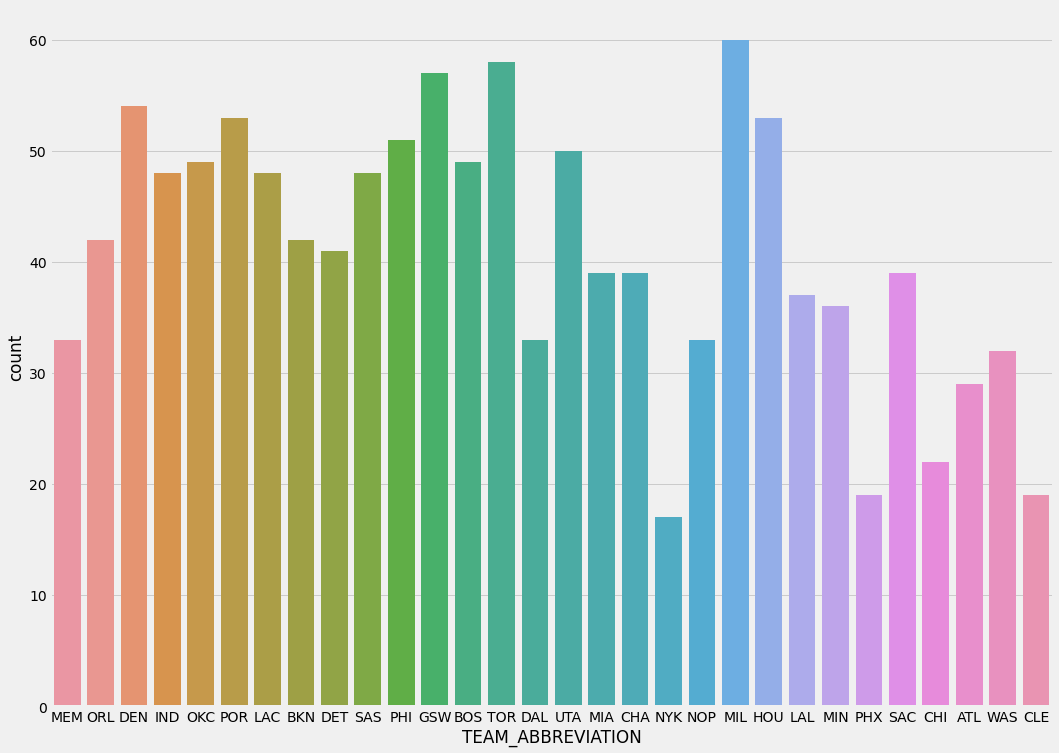

In [31]:
game_win_query = game_log_1819.query('WL == "W"')
fig, ax = plt.subplots(figsize=(16,12))
sns.countplot(x='TEAM_ABBREVIATION', data=game_win_query, ax=ax);

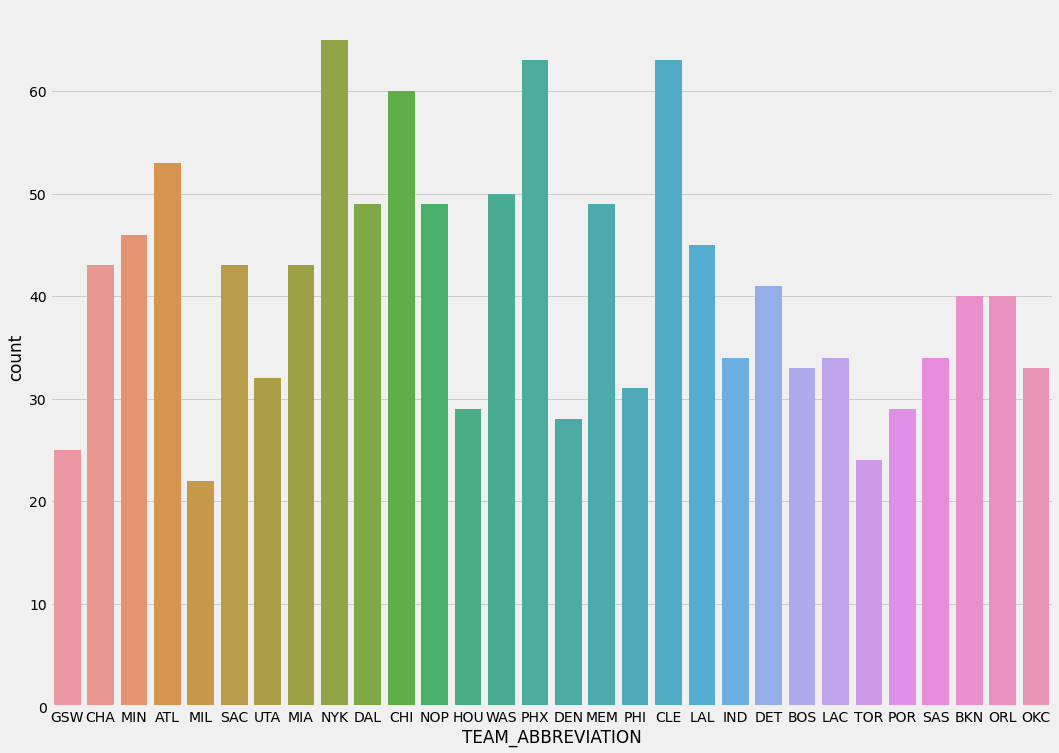

In [32]:
game_loss_query = game_log_1819.query('WL == "L"')
fig, ax = plt.subplots(figsize=(16,12))
sns.countplot(x='TEAM_ABBREVIATION', data=game_loss_query, ax=ax);

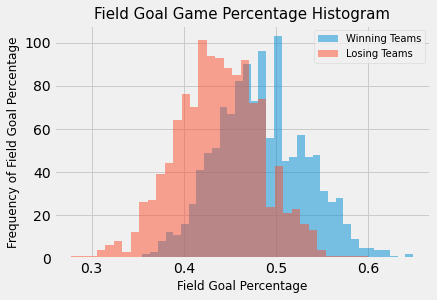

In [73]:
fig, ax = plt.subplots()
ax.hist(game_win_query['FG_PCT'], alpha=0.5, bins=35, label='Winning Teams')
ax.hist(game_loss_query['FG_PCT'], alpha=0.5, bins=35, label='Losing Teams')
ax.set_xlabel('Field Goal Percentage', size=12)
ax.set_ylabel('Frequency of Field Goal Percentage', size=12)
ax.set_title('Field Goal Game Percentage Histogram', size=15)
ax.legend(prop={'size': 10});

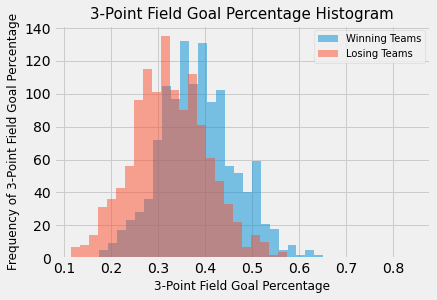

In [69]:
fig, ax = plt.subplots()
ax.hist(game_win_query['FG3_PCT'], alpha=0.5, bins=35, label='Winning Teams')
ax.hist(game_loss_query['FG3_PCT'], alpha=0.5, bins=35, label='Losing Teams')
ax.set_xlabel('3-Point Field Goal Percentage', size=12)
ax.set_ylabel('Frequency of 3-Point Field Goal Percentage', size=12)
ax.set_title('3-Point Field Goal Game Percentage Histogram', size=15)
ax.legend(prop={'size': 10});

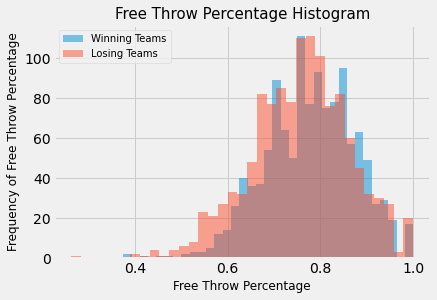

In [71]:
fig, ax = plt.subplots()
ax.hist(game_win_query['FT_PCT'], alpha=0.5, bins=35, label='Winning Teams')
ax.hist(game_loss_query['FT_PCT'], alpha=0.5, bins=35, label='Losing Teams')
ax.set_xlabel('Free Throw Percentage', size=12)
ax.set_ylabel('Frequency of Free Throw Percentage', size=12)
ax.set_title('Free Throw Game Percentage Histogram', size=15)
ax.legend(prop={'size': 10});

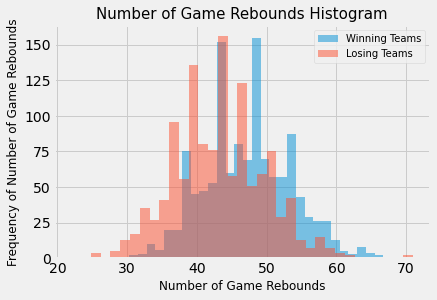

In [72]:
fig, ax = plt.subplots()
ax.hist(game_win_query['REB'], alpha=0.5, bins=35, label='Winning Teams')
ax.hist(game_loss_query['REB'], alpha=0.5, bins=35, label='Losing Teams')
ax.set_xlabel('Number of Game Rebounds', size=12)
ax.set_ylabel('Frequency of Number of Game Rebounds', size=12)
ax.set_title('Number of Game Rebounds Histogram', size=15)
ax.legend(prop={'size': 10});

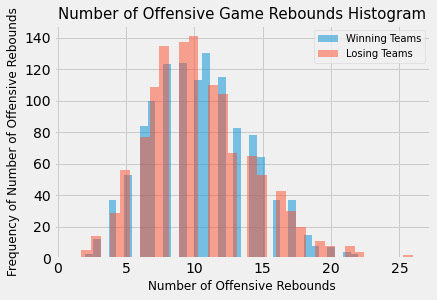

In [74]:
fig, ax = plt.subplots()
ax.hist(game_win_query['OREB'], alpha=0.5, bins=35, label='Winning Teams')
ax.hist(game_loss_query['OREB'], alpha=0.5, bins=35, label='Losing Teams')
ax.set_xlabel('Number of Offensive Rebounds', size=12)
ax.set_ylabel('Frequency of Number of Offensive Rebounds', size=12)
ax.set_title('Number of Offensive Game Rebounds Histogram', size=15)
ax.legend(prop={'size': 10});

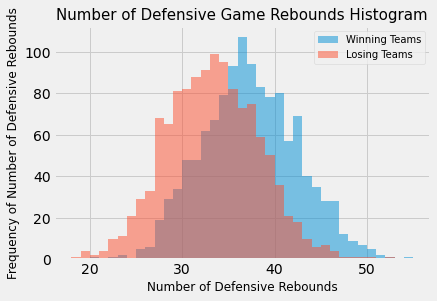

In [75]:
fig, ax = plt.subplots()
ax.hist(game_win_query['DREB'], alpha=0.5, bins=35, label='Winning Teams')
ax.hist(game_loss_query['DREB'], alpha=0.5, bins=35, label='Losing Teams');
ax.set_xlabel('Number of Defensive Rebounds', size=12)
ax.set_ylabel('Frequency of Number of Defensive Rebounds', size=12)
ax.set_title('Number of Defensive Game Rebounds Histogram', size=15)
ax.legend(prop={'size': 10});

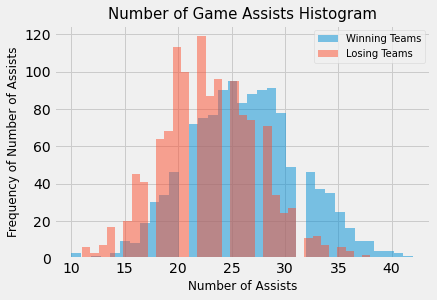

In [76]:
fig, ax = plt.subplots()
ax.hist(game_win_query['AST'], alpha=0.5, bins=35, label='Winning Teams')
ax.hist(game_loss_query['AST'], alpha=0.5, bins=35, label='Losing Teams')
ax.set_xlabel('Number of Assists', size=12)
ax.set_ylabel('Frequency of Number of Assists', size=12)
ax.set_title('Number of Game Assists Histogram', size=15)
ax.legend(prop={'size': 10});

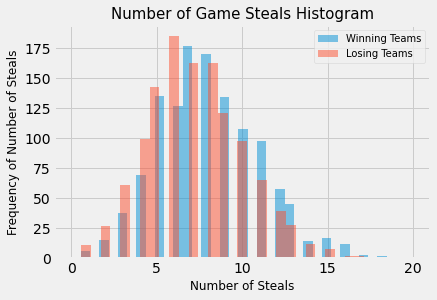

In [77]:
fig, ax = plt.subplots()
ax.hist(game_win_query['STL'], alpha=0.5, bins=35, label='Winning Teams')
ax.hist(game_loss_query['STL'], alpha=0.5, bins=35, label='Losing Teams')
ax.set_xlabel('Number of Steals', size=12)
ax.set_ylabel('Frequency of Number of Steals', size=12)
ax.set_title('Number of Game Steals Histogram', size=15)
ax.legend(prop={'size': 10});

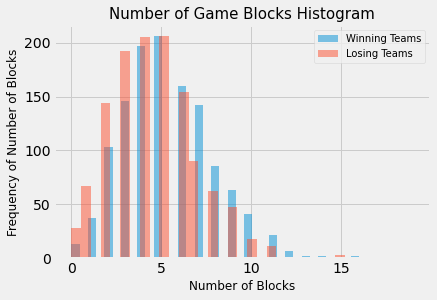

In [78]:
fig, ax = plt.subplots()
ax.hist(game_win_query['BLK'], alpha=0.5, bins=35, label='Winning Teams')
ax.hist(game_loss_query['BLK'], alpha=0.5, bins=35, label='Losing Teams')
ax.set_xlabel('Number of Blocks', size=12)
ax.set_ylabel('Frequency of Number of Blocks', size=12)
ax.set_title('Number of Game Blocks Histogram', size=15)
ax.legend(prop={'size': 10});

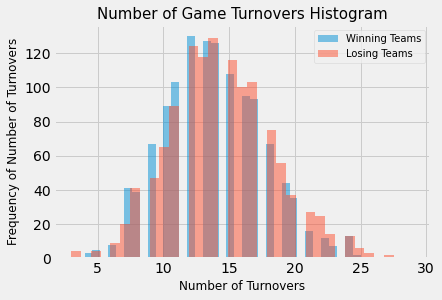

In [79]:
fig, ax = plt.subplots()
ax.hist(game_win_query['TOV'], alpha=0.5, bins=35, label='Winning Teams')
ax.hist(game_loss_query['TOV'], alpha=0.5, bins=35, label='Losing Teams')
ax.set_xlabel('Number of Turnovers', size=12)
ax.set_ylabel('Frequency of Number of Turnovers', size=12)
ax.set_title('Number of Game Turnovers Histogram', size=15)
ax.legend(prop={'size': 10});

fig, ax = plt.subplots()
ax.hist(game_log_1819['FGA'], bins=50)
plt.show()

fig, ax = plt.subplots()
ax.hist(game_log_1819['FGM'], bins=50)
plt.show()

fig, ax = plt.subplots()
ax.hist(game_log_1819['FG_PCT'], bins=50)
plt.show()

fig, ax = plt.subplots()
ax.scatter(game_log_1819['FGA'], game_log_1819['FGM'])
ax.set_xlabel('Field Goals Attempted')
ax.set_ylabel('Field Goals Made')
plt.show()

fig, ax = plt.subplots()
ax.scatter(game_log_1819['FG3A'], game_log_1819['FG3M'])
ax.set_xlabel('3-Point Field Goals Attempted')
ax.set_ylabel('3-Point Field Goals Made')
plt.show()

fig, ax = plt.subplots()
ax.scatter(game_log_1819['OREB'], game_log_1819['DREB'])
ax.set_xlabel('Offensive Rebounds')
ax.set_ylabel('Defensive Rebounds')
plt.show()

### Hypothesis Tests

**Scientific question:** Is there a play between offensive and defensive play that is more effective in achieving a game win?

**Null:** There is no difference between the impact of offensive or defensive play in achieving a game win.

**Alternative:** There is a difference between the impact of offensive or defensive play in achieving a game win.

**Test statistic:** 2,460 regular season games from the 20xx - xx NBA season
(=82 games per team * 30 NBA teams)

Dataset: using proxies, such as either offensive (ORtg) and defensive (DRtg) ratings or offense and defense four factors, for efficient offensive and defensive play respectively

### Conclusion